关键点为：
    K值的选取和点距离的计算。
点距离的计算
    L2二维空间欧式距离
    多维空间欧式距离

K值的选取：
    K取多少值好呢？答案是通过交叉验证
    不断增加K的值，然后计算验证集合的方差，最终找到一个比较合适的K值

KNN算法优点
简单易用，相比其他算法，KNN算是比较简洁明了的算法。即使没有很高的数学基础也能搞清楚它的原理。
模型训练时间快，上面说到KNN算法是惰性的，这里也就不再过多讲述。
预测效果好。
对异常值不敏感
KNN算法缺点
对内存要求较高，因为该算法存储了所有训练数据
预测阶段可能很慢
对不相关的功能和数据规模敏感


当需要使用分类算法，且数据比较大的时候就可以尝试使用KNN算法进行分类了

KNN模型的构建
1）生成一些训练数据。
2）对于一个给定的数k，创建一个k-NN对象。
3）为我们要分类的一个新数据点找到k个最近邻。
4）根据多数票分配新数据点的类标签.
5）绘制结果.

In [69]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') #设置plot背景样式
np.random.seed(42)

In [70]:
single_data = np.random.randint(0,100,2)

single_label = np.random.randint(0,2,1)
single_label

array([0])

randint 随机生成[0,2) 然后shape个数据

In [71]:
def generate_data(num_sample, num_features = 2):
    data_size = (num_sample,num_features)
    train_data = np.random.randint(0, 100, size= data_size)
    label_size = (num_sample,1)
    labels = np.random.randint(0, 2, size=label_size)
    return train_data.astype(np.float32),labels

plot 画图绘制城镇地图势力

In [72]:
train_data ,labels = generate_data(11)
def plot_data(blues, reds):
    plt.figure(figsize=(10,6))
    plt.scatter(blues[:,0], blues[:,1],c = 'blue' ,marker='s',s=180)
    plt.scatter(reds[:,0],reds[: ,1],c = 'red' ,marker='^',s =180)
    plt.xlabel('x')
    plt.ylabel('y')

def new_plot_data(blues, reds):
    plt.scatter(blues[:,0], blues[:,1],c = 'blue' ,s=180)
    plt.scatter(reds[:,0],reds[: ,1],c = 'red' ,s =180)
    plt.xlabel('x')
    plt.ylabel('y')

将数据集拆分为red 和blue,ravel平展数组
数据分析的一个小技巧

a = np.array([1,2,3,4])
b = [False,True,False,True]
c= a[b==False]
d = a[b==True]
c= [2,4]


In [73]:
a = np.array([1,2,3,4])
b = np.array([0,1,0,1])
c = a[b==False]
d = a[b==True]
c,d


(array([1, 3]), array([2, 4]))

reshape(-1) 和 ravel()函数的作用一致
blue 是0 ，red 是1

In [74]:
blue = train_data[labels.reshape(-1) == 0]
red = train_data[labels.ravel() == 1]

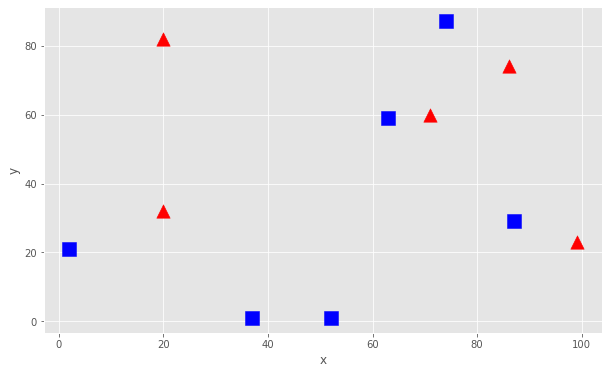

In [75]:
plot_data(blue,red)

正式使用KNN分类器 cv2.ml.KNearest_create()

In [76]:
knn = cv2.ml.KNearest_create()
knn.train(train_data,cv2.ml.ROW_SAMPLE,labels)

True

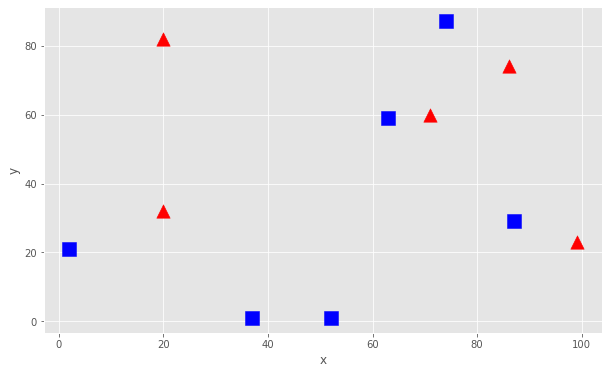

In [77]:

plot_data(blue,red)


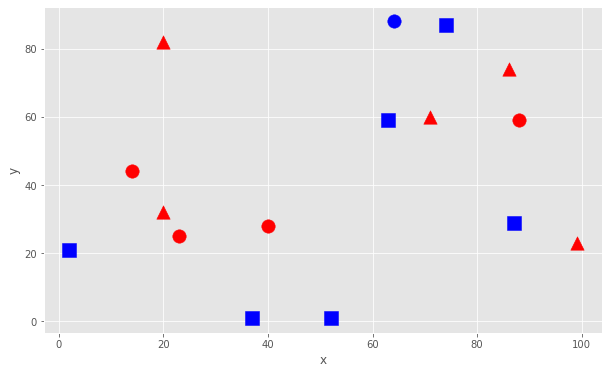

In [84]:
newcomer,_ = generate_data(5) # index and label (2, 2)
ret , results, neighbor , dist = knn.findNearest(newcomer,1)
ret , results, neighbor , dist
results = np.array(results,dtype=np.int)

new_label = results
new_blue = newcomer[results.ravel() == 0]
new_red = newcomer[results.ravel()== 1]
plot_data(blue,red)
new_plot_data(new_blue,new_red)
plt.show()


knn报告最近邻居是250个任意单位距离，这个邻居标签是1
k-NN的结果随k值的变化而变化。但是，通常我们事先并不知道k取什么值最合适